<a href="https://colab.research.google.com/github/Ajay07pandey/play_store_app_review_system/blob/main/play_store_app_review_system_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Introduction**

Google Play is a website and app that gives users access to download and purchase apps, books, game, movies, music, and other content from Google for Android devices.
Android is the dominant mobile operating system today with about 85% of all mobile devices running Google’s OS. The Google Play Store is the largest and most popular Android app store.



To launch themselves successfully and create an identity for themselves in this oversaturated market, they need to ensure that majority of the essential factors are taken into consideration. However, the lack of a clear understanding impacts both the developers and users.
It is an immense challenge for a developer to know whether they are focusing on the right path to make their app successful on the platform.

The purpose of our project was to gather and analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.

# **2. Exploratory Data Analysis**

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. 

**Importing required libraries.**

In [1]:
#import library
import numpy as np #linear algebra
import pandas as pd #data proceing, csv file I/O
import matplotlib.pyplot as plt #visualization tool
import seaborn as sns #for making plot with seaborn
%matplotlib inline

**Mounted Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Dataset**

In [3]:
# Mounting the drive to access our dataset.
df_data= pd.read_csv("/content/drive/MyDrive/Project EDA/Copy of Play Store Data.csv")
df_reviews= pd.read_csv("/content/drive/MyDrive/Project EDA/Copy of User Reviews.csv")

In [4]:
#Display play store app data
df_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#Display user reviews data
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
#Checking tail for play store data
df_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
#Checking tail for User reviews data
df_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [8]:
#Checking Summary for play store data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
#Checking summary for user reviews data
df_reviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [10]:
#checking null for Play store data
df_data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#checking null for user reviews data
df_reviews.isnull()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,True,True,True
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64290,False,True,True,True,True
64291,False,True,True,True,True
64292,False,True,True,True,True
64293,False,True,True,True,True


In [12]:
# Checking random 5 rows of the playstore dataset.
df_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10003,The List,NEWS_AND_MAGAZINES,3.5,66,12M,"10,000+",Free,0,Everyone,News & Magazines,"June 1, 2017",6.11,4.1 and up
8339,DF Wall Plus – Droid Firewall,TOOLS,NaN,9,6.3M,500+,Free,0,Everyone,Tools,"August 20, 2017",1.0,4.0.3 and up
4281,CIRCLE K,SHOPPING,4.4,9140,14M,"500,000+",Free,0,Everyone,Shopping,"July 31, 2018",5.9.0,4.4 and up
9325,E.G. Chess,GAME,4.3,56,23M,"1,000+",Paid,$0.99,Everyone,Board,"December 6, 2014",1.0.28,2.3 and up
10181,FaFaFa™ Gold Casino: Free slot machines,GAME,4.3,11051,44M,"1,000,000+",Free,0,Teen,Casino,"June 25, 2018",1.9.58,4.0.3 and up


In [13]:
# Checking random 5 rows of the user reviews dataset.
df_reviews.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1720,8fit Workouts & Meal Planner,NaN,NaN,NaN,NaN
3296,ASUS Gallery,NaN,NaN,NaN,NaN
8530,Apartments & Rentals - Zillow,NaN,NaN,NaN,NaN
58366,HD Camera - Best Cam with filters & panorama,NaN,NaN,NaN,NaN
11406,Baby Panda Care,love game cant play non stop,Positive,0.05,0.5


In [14]:
# Checking the maximum rows and columns available in our datasets.
df_data.shape, df_reviews.shape

((10841, 13), (64295, 5))

**FINDINGS FROM PLAY STORE DATA SET**

**play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:**

1. **App** - It tells us about the name of the application.
2. **Category** - It tells us about the category to which an application belongs.
3. **Rating**- It tells us about the ratings given by the users for a specific application.
4. **Reviews** - It tells us about the total number of users who have given a review for the application.
5. **Size**- It tells us about the size being occupied the application on the mobile phone.
6. **Installs** - It tells us about the total number of installs/downloads for an application.
7. **Type** - It tells us whether the application is free or a paid one.
8. **Price**- It tells us about the price of the application.
9. **Content_Rating**- It tells us about the target audience for the application.
10. **Genres** - It tells us about the various other categories to which an application can belong.
11. **Last_Updated** - It tells us about the when the application was updated.
12. **Current_Ver** - It tells us about the current version of the application. 
13. **Android_Ver** - It tells us about the android version which can support the application on its platform.

In [15]:
# Determining duplicate values in our play store dataset.
df_data.duplicated().sum()

483

# 3. **PROBLEM STATEMENT**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

Explore and analyze the data to discover key factors responsible for app engagement and success.


1. What are the top categories on the Play Store?
2. Which category has the most no. of  installations?
3. How does app rating affect the application?
4. How Size, Reviews, Installs and Price of apps are correlated?
5. What is the Relation between app category and app price?
6. How does the last update have an effect on the rating?
7. How does sentiment polarity and subjectivity affect the size,rating,and     review?
8. What is the average rating of apps?
9. Are the majority of the apps Paid or Free?
10. How are Installs and Rating correlated?
11. Which are the most expensive apps and name their corresponding categories?
12. Which are Top revenue generated apps and what are their corresponding categories?
13. What is the relation between sentiment polarity and sentiment subjectivity?
14. How Content rating affects number of installs?
15. How are ratings affected when the app is a paid one?
16. How does the size of an app affect the ratings and number of installs?


# 4. **Data Cleaning for Play Store Data Set**

* Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled.
* If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. 
* There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset. But it is crucial to establish a template for your data cleaning process so you know you are doing it the right way every time.

In [16]:
# Dropping the duplicate values from Play store dataset.
df_data= df_data.drop_duplicates()

In [17]:
# Rechecking the shape of our play store dataset after dropping all the duplicates.
df_data.shape

(10358, 13)

In [18]:
#Rechecking our play store dataset wheather they have any more duplicate values.
df_data.duplicated().sum()

0

**It's good to know that we don't have more duplicate values in Play store dataset but still we have some null and missing values. Let's deal with them.**

In [19]:
df_data.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10558,Austria Wien FK - Fussball - Inoffizielle App,SPORTS,NaN,2,12M,100+,Free,0,Everyone,Sports,"July 27, 2018",1.0.4,4.1 and up
10417,FH Wallet,FINANCE,NaN,0,9.9M,1+,Free,0,Everyone,Finance,"July 26, 2018",1.0.0,4.1 and up
3253,ZenUI Help,TOOLS,4.6,136874,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"June 25, 2018",Varies with device,Varies with device


In [20]:
# Defining the function 
def get_info(df):
  func_df= pd.DataFrame(index= df.columns, columns=["datatype", "total_values", "na_values", "non_na_values", "%na_values", "unique_count"])
  func_df["datatype"]= [type(i) for i in list(df.columns)]
  func_df["total_values"]= [len(df[i]) for i in list(df.columns)]
  func_df["na_values"]= [df[i].isnull().sum() for i in list(df.columns)]
  func_df["non_na_values"]= [(~df[i].isnull()).sum() for i in list(df.columns)]
  func_df["%na_values"]= [df[i].isnull().mean()*100 for i in list(df.columns)]
  func_df["unique_count"]= [len(df[i].unique()) for i in list(df.columns)]
  return func_df

In [21]:
#Checking the info of our first dataset(playstore).
get_info(df_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10358,0,10358,0.000000,9660
Category,<class 'str'>,10358,0,10358,0.000000,34
Rating,<class 'str'>,10358,1465,8893,14.143657,41
Reviews,<class 'str'>,10358,0,10358,0.000000,6002
Size,<class 'str'>,10358,0,10358,0.000000,462
Installs,<class 'str'>,10358,0,10358,0.000000,22
Type,<class 'str'>,10358,1,10357,0.009654,4
Price,<class 'str'>,10358,0,10358,0.000000,93
Content Rating,<class 'str'>,10358,1,10357,0.009654,7
Genres,<class 'str'>,10358,0,10358,0.000000,120


**We are having total null values in:**

*   Rating = 1465
*   Type = 1
*   Content Rating = 1
*   Current Ver = 8
*   Android Ver = 3

Since we have **0.009654%, 0.009654%, 0.077235%, 0.028963%** null values in Type, Content Rating, Current Ver, Android Ver columns respectively which won't affect our results, so we can drop them.

The Rating column contains **1470 NaN values** which accounts to apprximately **14.1436%** of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.

**Replacing all the null values of "Rating" column with Mode**





In [22]:
#Dropping null values from Type,Content Ratings,Current ver and android ver columns.
df_data.dropna(subset=["Type","Content Rating", "Current Ver", "Android Ver"], inplace= True)

In [23]:
get_info(df_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10346,0,10346,0.000000,9648
Category,<class 'str'>,10346,0,10346,0.000000,33
Rating,<class 'str'>,10346,1460,8886,14.111734,40
Reviews,<class 'str'>,10346,0,10346,0.000000,5999
Size,<class 'str'>,10346,0,10346,0.000000,457
Installs,<class 'str'>,10346,0,10346,0.000000,20
Type,<class 'str'>,10346,0,10346,0.000000,2
Price,<class 'str'>,10346,0,10346,0.000000,92
Content Rating,<class 'str'>,10346,0,10346,0.000000,6
Genres,<class 'str'>,10346,0,10346,0.000000,119


In [24]:
df_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4160,G Cloud Backup,PRODUCTIVITY,4.6,267042,Varies with device,"5,000,000+",Free,0,Everyone,Productivity,"April 29, 2018",Varies with device,Varies with device
3057,Tennis 24 - tennis live scores,SPORTS,4.6,990,9.4M,"100,000+",Free,0,Everyone,Sports,"July 18, 2018",2.28.1,4.1 and up
1132,CNBC: Breaking Business News & Live Market Data,FINANCE,4.2,24647,Varies with device,"1,000,000+",Free,0,Everyone,Finance,"July 13, 2018",Varies with device,Varies with device
2911,Camera360: Selfie Photo Editor with Funny Sticker,PHOTOGRAPHY,4.3,4865107,51M,"100,000,000+",Free,0,Everyone,Photography,"August 6, 2018",9.3.1,4.0.3 and up
3484,Advanced Task Killer,PRODUCTIVITY,4.4,577059,1.5M,"50,000,000+",Free,0,Everyone,Productivity,"August 7, 2016",2.2.1B216,2.3.3 and up


In [25]:
# Checking the mode in our df_data rating column of our dataset.
df_data["Rating"].mode()

0    4.4
dtype: float64

In [26]:
# Converting the series object into numpy float type object.
df_data["Rating"].mode()[0]

4.4

In [27]:
#filling null values from rating column with mode.
df_data= df_data.fillna(df_data["Rating"].mode()[0])

In [28]:
# convert free values in Type column to 0
df_data[df_data['Type']!='Free'][df_data[df_data['Type']!='Free']['Price']=='0']
#Changing the 'Reviews' column values into valid numeric values
df_data['Reviews'] = pd.to_numeric(df_data['Reviews'])

In [29]:
get_info(df_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10346,0,10346,0.0,9648
Category,<class 'str'>,10346,0,10346,0.0,33
Rating,<class 'str'>,10346,0,10346,0.0,39
Reviews,<class 'str'>,10346,0,10346,0.0,5999
Size,<class 'str'>,10346,0,10346,0.0,457
Installs,<class 'str'>,10346,0,10346,0.0,20
Type,<class 'str'>,10346,0,10346,0.0,2
Price,<class 'str'>,10346,0,10346,0.0,92
Content Rating,<class 'str'>,10346,0,10346,0.0,6
Genres,<class 'str'>,10346,0,10346,0.0,119


**Lets deal with some special characters (, $ +) and letters (M,k) present in the Installs, Size, and Price columns**


1.all the columns except rating have the object data type but some of the columns like, reviews, size, installs and price have the numerical value. So, we have to transform them into a proper data type and

2.also remove the unwanted values from the numerical columns like ‘+’ and ‘,’ from installs and ‘$’ from price.

3.In the size column we have some values in KB and some values in MB, so we transform all the values in MB. 

4.
    We have string format in Last Updated column. We need to typecaste it into datetime format to deal with it.

In [30]:
# List of character needs to be remove
list_of_chars = ['+', ',' , '$' ]
# List of column names to clean
list_of_columns = ['Installs', 'Price']

# Loop for each column
for col in list_of_columns:
    # Replace each character with an empty string
    for char in list_of_chars:
        df_data[col] = df_data[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    df_data[col] = pd.to_numeric(df_data[col])

# Typecasting the str type to timestamp in "Latest Updated" column.
df_data["Last Updated"]= pd.to_datetime(df_data["Last Updated"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  int64         
 4   Size            10346 non-null  object        
 5   Installs        10346 non-null  int64         
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  float64       
 8   Content Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Last Updated    10346 non-null  datetime64[ns]
 11  Current Ver     10346 non-null  object        
 12  Android Ver     10346 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.1+ MB


Now as you can see in the size column 'M' stands for MB and 'k' stands for KB. it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB. (1MB = 1024KB)

In [32]:
#defining function to convert all unti in MB and removing unit symbol
def convert(i):
  if 'k' in i:
    return float(i[:-1])/1024
  elif 'M' in i:
    return float(i[:-1])
  else:
    return 

df_data['Size']=df_data['Size'].apply(convert)

In [33]:
df_data['Size'] 

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10346, dtype: float64

**Hurray! We have succesfully removed all the null and duplicate values from our play store dataset. Let us now do the same thing from user review dataset.**

**FINDINGS FROM USER REVIEW DATA SET**

**User Reviews dataframe has 64295 rows and 5 columns. 5 columns are identified as below:**

1.**App**- Application name. 

2.**Translated_Review**- User review.

3.**Sentiment**- Positive/Negative/Neutral

4.**Sentiment_Polarity**- sentiment polarity score

5.**Sentiment_Subjectivity**-sentiment subjectivity score

In [34]:
df_reviews.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
18298,Bubble Shooter 2,NaN,NaN,NaN,NaN
39465,El tiempo de AEMET,NaN,NaN,NaN,NaN
18001,Bualuang mBanking,NaN,NaN,NaN,NaN
63139,Homescapes,NaN,NaN,NaN,NaN
8241,"Any.do: To-do list, Calendar, Reminders & Planner",Frustrating app... Nothing simple... Where del...,Negative,-0.2,0.628571


In [35]:
df_reviews.shape

(64295, 5)

In [36]:
#finding duplicate values
df_reviews.duplicated().sum()

33616

# **5. Cleaning for User reviews data set**

In [37]:
#Dropping duplicate values
df_reviews= df_reviews.drop_duplicates()

In [38]:
#Rechecking to verify if duplicate values are removed
df_reviews.duplicated().sum()

0

**so, now we have removed all duplicate values from user review data set, let's proceed to deal with null values.**

In [39]:
#Dropped all null values.
df_reviews= df_reviews.dropna()

In [40]:
get_info(df_reviews)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,29692,0,29692,0.0,865
Translated_Review,<class 'str'>,29692,0,29692,0.0,27994
Sentiment,<class 'str'>,29692,0,29692,0.0,3
Sentiment_Polarity,<class 'str'>,29692,0,29692,0.0,5410
Sentiment_Subjectivity,<class 'str'>,29692,0,29692,0.0,4474


In [41]:
df_data.shape, df_reviews.shape

((10346, 13), (29692, 5))

# **Sentiment polarity and Sentiment subjectivity analysis**

**There are 4 features which gives the information about user engagement with the andriod apps in the play store.**
* Here there is data about the translated reviews given by the users, Sentiment polarity, Sentiment subjectivity and Sentiment for a given app.

* Polarity is float which lies in the range of [-1,1] where value is near to 1 means positive statement and values near to -1 means a negative statement.

* Subjectivity is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual.

* For example, if subjectivity value is near to 1 means its a public opinion and if its near to 0 means its a factual data.

* Sentiment finally gives whether it is positive, negative or neutral statement/reviews for a given app.


# **Let's start with data analysis on Play Store Apps**

## **1**.**Top category in the google play store**

In [42]:
x = df_data['Category'].value_counts().index
y = df_data['Category'].value_counts()
x_axis = []
y_axis = []
for i in range(len(x)):
    x_axis.append(x[i])
    y_axis.append(y[i])


Now we will plot the graph with the help of seaborn and taking Number of Apps on X axis and App Categories on Y axis.

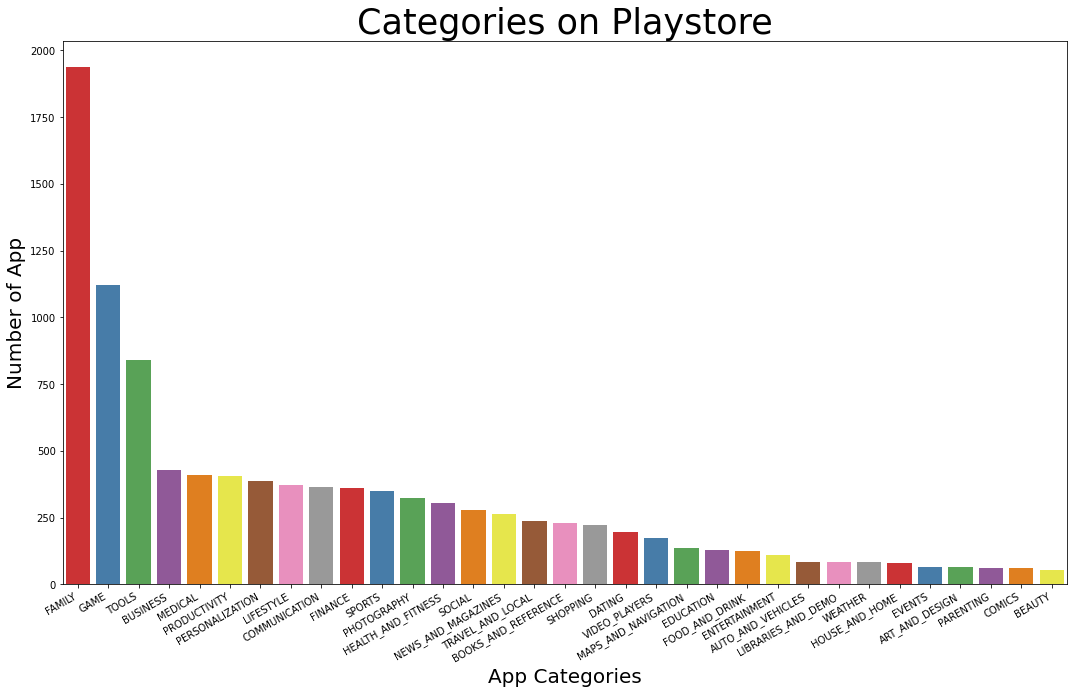

In [43]:
plt.figure(figsize=(18,10))
plt.xlabel('App Categories', size=20)
plt.ylabel('Number of App', size=20)
graph = sns.barplot(x = x_axis, y = y_axis,palette = "Set1")
graph.set_title("Categories on Playstore", fontsize = 35)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30, horizontalalignment='right');

From the above Bar Chart's output we can say that most of the apps in the play store come under **FAMILY & GAME category** and least are of **EVENTS & BEAUTY Category.**
It means majority of apps are from either FAMILY or GAME category

Does higher the number of app in a particular category result in popularity of apps(Higher no of installs) ? **Lets find out..**.


##**2**. **Number of Installed apps in Play store**


Text(0.5, 1.0, 'Total app installs in each category')

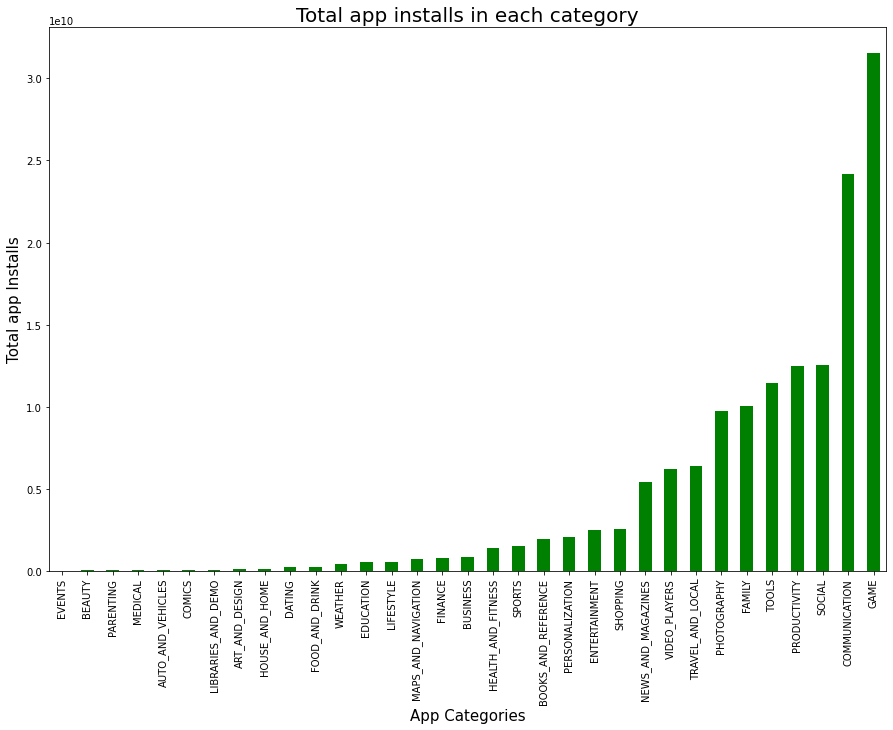

In [44]:
# Highest number of installed apps in each category
variable = df_data.groupby(['Category'])['Installs'].sum().sort_values()
variable.plot.bar(figsize=(15,10), color = 'g', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.title('Total app installs in each category', fontsize = 20)

Hence from the above figure it is clear that people love GAME,COMMUNICATION and SOCIAL Apps rather than FAMILY catogeries apps instead they are more in numbers, so we can take insights that GAMING Application will have good opportunity in the future also.

##**3**. **HOW DOES APP RATING AFFECT THE APPLICATION**

After witnessing the market share for each category of apps, let's see how all these apps perform on an average. App ratings on a scale of 1 to 5, it shows company's overall brand image. **Ratings are a key performance indicator of an app.**

The analysis of app ratings is important because, this only gives the information how much an app is **liked or disliked** by the people. So that we have plotted the **histrogram for Ratings** it shows the category wise avg rating.

Average Rating 4.21788130678523


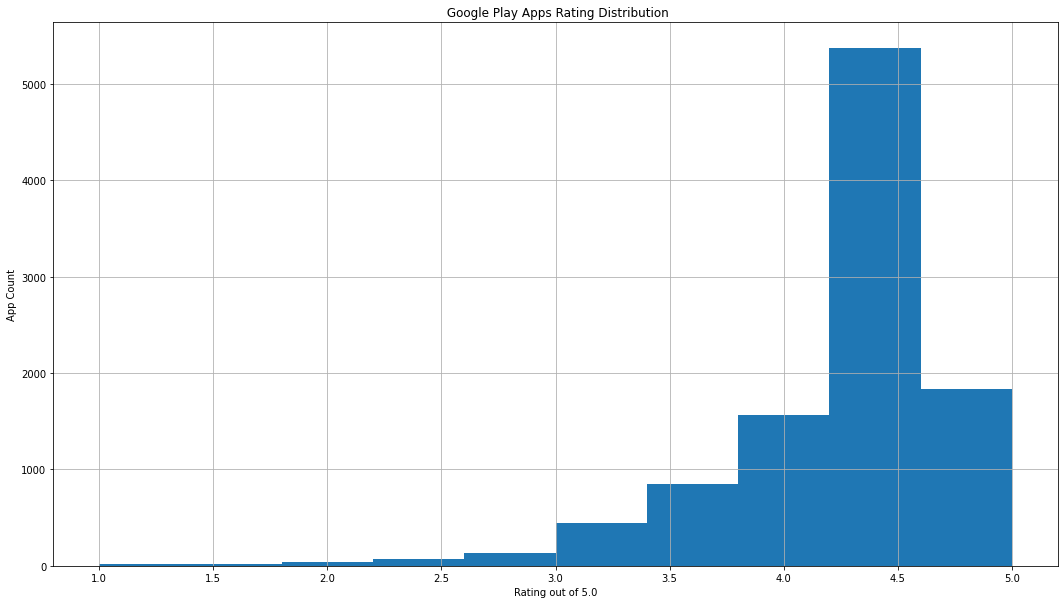

In [45]:
#Plot a histogram from the Rating column
plt.figure(figsize=(18,10))
print(f"Average Rating {df_data['Rating'].mean()}")

df_data["Rating"].hist()
plt.title(" Google Play Apps Rating Distribution")
plt.ylabel("App Count")
plt.xlabel("Rating out of 5.0")
plt.show()

From our observation, we found that the average volume of ratings across all app categories is **4.217**.
In the histogram plot majority of the apps are highly rated with only **few exceptions** in the low-rated apps.

##**4**. **How Size, Reviews, Installs and Price of apps are correlated.**

Text(0.5, 1.0, 'Correlation Heatmap for Playstore Data')

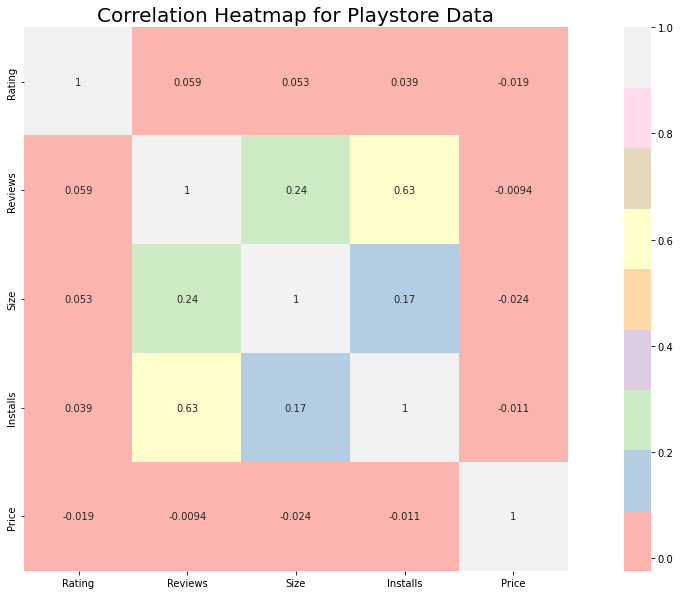

In [46]:
# Heat map for play_store
plt.figure(figsize = (20,10))
sns.heatmap(df_data.corr(), annot= True,cmap=sns.color_palette('Pastel1'),square=True)
plt.title('Correlation Heatmap for Playstore Data', size=20)

 1. There is a **positive correlation** between the Reviews and Installs column i.e **(0.63)**. Higher the number of review,higher the total number of downloads.
which means customer downloads a given app more **if it is reviewed by large no.of people.**

2. The Price is **slightly negatively correlated with the Rating**, Reviews, and  Installs. 
Which means if the price of app increases, the average rating, total number of reviews and Installs fall down.

3. The Rating is **slightly positive correlated with the Installs and Reviews column.**
This shows that if the Rating of an app increases then it will also increase the downloads and reviews of a given app.

4. Hence we can conclude that **increasing** the review and Rating count in the app, may increase in the market share of a app.

5. To capture the market more rapidley The **launch price** of an app should be **less** at the starting and then can be increased with time.

##**5**. **what is the Relation between app category and app price**

So now comes the hard part. How are companies and developers supposed to make **end meet**? What monetization strategies can companies use to **maximize profit?** The costs of apps are largely based on features, complexity, and platform. Lets plot a graph and see.

Here we are selecting some most popular app category from the data set for our analysis i.e GAME, FAMILY, PHOTOGRAPHY, MEDICAL, TOOLS, FINANCE, LIFESTYLE , BUSINESS

Text(0.5, 1.0, 'App pricing trend across categories')

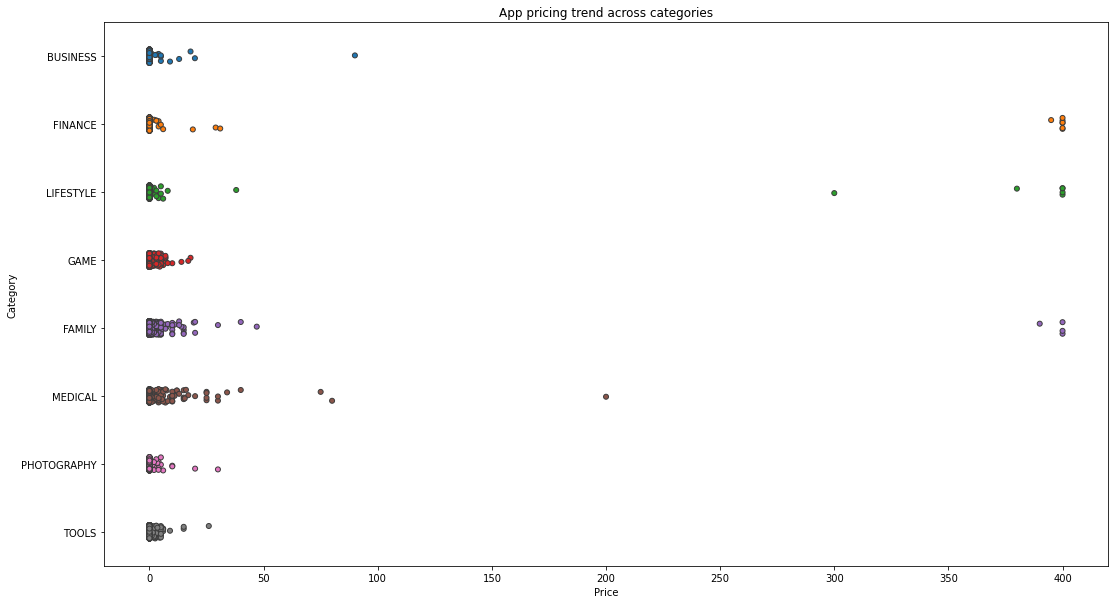

In [47]:
graph, plot = plt.subplots()
graph.set_size_inches(18,10)
popular_app= df_data[df_data.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY','MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
plot = sns.stripplot(x = popular_app['Price'], y = popular_app['Category'], jitter=True, linewidth=1)
plot.set_title('App pricing trend across categories')


* Many factors to be consider when selecting the right pricing strategy for your mobile app. It is important to **re-evaluate** the app price before entering the market.**Is it worth the pice or not?**.

* Here we can see that Different categories apps demand **different price ranges**. Some apps that are simple and easy are free, where as apps in category FAMILY LIFESTYLE FINANCE and MEDICAL are high in price.

* All Game apps are comparetively **low in price**, may be thats the reason game apps have more number of downloads, as we have seen earlier.   